<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# Imports
from sensemakr import sensemakr
from sensemakr import sensitivity_stats
from sensemakr import bias_functions
from sensemakr import ovb_bounds
from sensemakr import ovb_plots
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
# loads data
darfur = pd.read_csv("data/darfur.csv")
darfur.head()

,wouldvote,peacefactor,peace_formerenemies,peace_jjindiv,peace_jjtribes,gos_soldier_execute,directlyharmed,age,farmer_dar,herder_dar,pastvoted,hhsize_darfur,village,female
0,0,1.000000,1,1,1,0,0,30,0,0,1,23,Abdel Khair,0
1,0,0.706831,0,1,1,0,0,20,1,0,1,5,Abdi Dar,1
2,1,0.000000,0,0,0,1,0,45,1,0,0,15,Abu Sorog,0
3,1,0.495178,1,0,0,0,1,55,0,0,0,9,Abu Dejaj,0
4,0,0.000000,0,0,0,1,1,25,1,0,1,7,Abu Dejaj,1


In [5]:
# runs regression model
reg_model = smf.ols(formula='peacefactor ~ directlyharmed + age + farmer_dar + herder_dar + '\
                    'pastvoted + hhsize_darfur + female + village', data=darfur)
model = reg_model.fit()

In [6]:
# Define parameters for sensemakr
treatment = "directlyharmed"
q = 1.0
alpha = 0.25
reduce = True
benchmark_covariates=["female"]
kd = [1, 2, 3]
ky = kd

In [7]:
# Create a sensemakr object and print summary of results
s = sensemakr.Sensemakr(model, treatment, q=q, alpha=alpha, reduce=reduce, benchmark_covariates=benchmark_covariates, kd=kd)
s.summary()

Sensitivity Analysis to Unobserved Confounding

Model Formula: peacefactor ~ Intercept + village[T.Abdi Dar] + village[T.Abu Dejaj] + village[T.Abu Gamra] + village[T.Abu Gawar] + village[T.Abu Geran] + village[T.Abu Jidad] + village[T.Abu Lihya] + village[T.Abu Mugu] + village[T.Abu Shouka] + village[T.Abu Sorog] + village[T.Abune] + village[T.Adar] + village[T.Agadier] + village[T.Agudna] + village[T.Agumi] + village[T.Aid Alkhair] + village[T.Airgy] + village[T.Aish Barra] + village[T.Ajayana] + village[T.Ajiji] + village[T.Akomi] + village[T.Al Gedisa] + village[T.Al Geneina] + village[T.Allah Forga] + village[T.Almetrabia] + village[T.Am Baro] + village[T.Am Dalal] + village[T.Am Dariro] + village[T.Am Dukhn] + village[T.Am Jarad] + village[T.Am Jemma] + village[T.Am Kharouba] + village[T.Amar] + village[T.Amdukhn] + village[T.Andabook] + village[T.Anderola] + village[T.Andita] + village[T.Anjilati] + village[T.Anjokati] + village[T.Aorda] + village[T.Aradeeba] + village[T.Arara] 

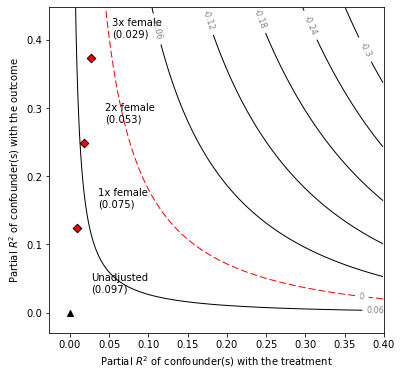

In [8]:
# Make a contour plot for the estimate
ovb_plots.ovb_contour_plot(sense_obj=s, sensitivity_of='estimate')